In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
avo=pd.read_csv('avocado.csv')
avo

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
avo=avo.drop(columns=avo.columns.values[0],axis=1)
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [5]:
avo.Date=avo.Date.astype('datetime64[ns]')
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [6]:
avo.type.value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [7]:
avo.type=avo.type.map({
    'conventional': 0,
    'organic': 1
    }).astype('int64')
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  int64         
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 1.8+ MB


In [8]:
avo['year']=avo.Date.dt.year
avo['month']=avo.Date.dt.month
avo=avo.drop(columns=['Date'],axis=1)
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int64  
 10  year          18249 non-null  int32  
 11  region        18249 non-null  object 
 12  month         18249 non-null  int32  
dtypes: float64(9), int32(2), int64(1), object(1)
memory usage: 1.7+ MB


## Classification to predict the region

In [9]:
avo_classification=avo.copy()
le=LabelEncoder()
avo_classification.region=le.fit_transform(avo_classification.region)
avo_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int64  
 10  year          18249 non-null  int32  
 11  region        18249 non-null  int32  
 12  month         18249 non-null  int32  
dtypes: float64(9), int32(3), int64(1)
memory usage: 1.6 MB


In [10]:
X,y=avo_classification.drop(columns=['region'],axis=1),avo_classification.region
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               shuffle=True,
                                               stratify=y,
                                               random_state=42)

In [11]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [12]:
# Random forest model
rfc=RandomForestClassifier(random_state=42)
cv_score=cross_val_score(estimator=rfc,
                        X=X_train_scaled,
                        y=y_train,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1).mean()
rfc.fit(X=X_train_scaled,
        y=y_train)
test_score=rfc.score(X=X_test_scaled,
                     y=y_test)
print(f'Cross val score = {cv_score}')
print(f'Test score = {test_score}')
print(f'Score diff = {abs(cv_score-test_score)}')

Cross val score = 0.9130077365806942
Test score = 0.9068493150684932
Score diff = 0.006158421512201029


In [13]:
# Gradient boosting model
gbc=GradientBoostingClassifier(random_state=42)
cv_score=cross_val_score(estimator=gbc,
                        X=X_train_scaled,
                        y=y_train,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1).mean()
gbc.fit(X=X_train_scaled,
        y=y_train)
test_score=gbc.score(X=X_test_scaled,
                     y=y_test)
print(f'Cross val score = {cv_score}')
print(f'Test score = {test_score}')
print(f'Score diff = {abs(cv_score-test_score)}')

Cross val score = 0.8438255701503188
Test score = 0.8424657534246576
Score diff = 0.0013598167256612115


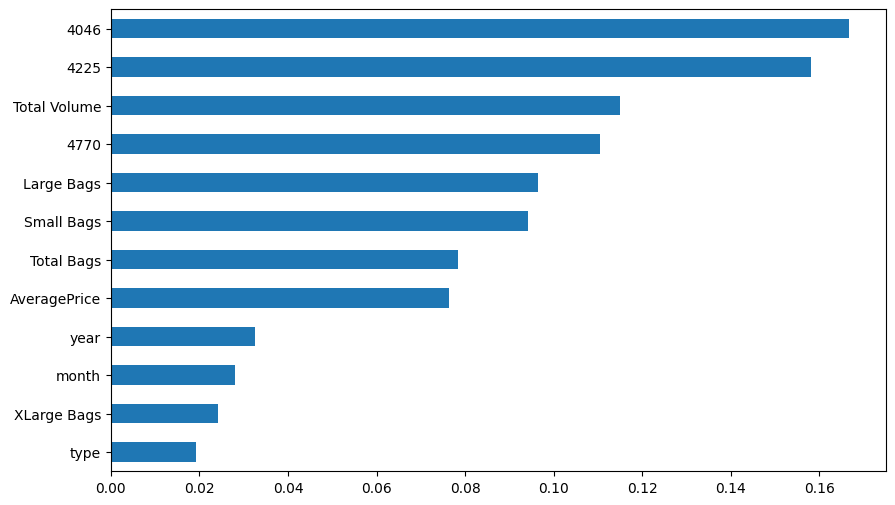

In [14]:
## Final model is the Random Forest model
feature_importance=pd.Series(data=rfc.feature_importances_,
                             index=X.columns.values).sort_values()
plt.figure(figsize=(10,6))
feature_importance.plot.barh();

In [15]:
y_pred=rfc.predict(X_test_scaled)
print(classification_report(y_pred=y_pred,
                            y_true=y_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        68
           1       0.88      0.88      0.88        68
           2       0.99      0.99      0.99        68
           3       0.95      0.88      0.91        67
           4       1.00      0.99      0.99        67
           5       0.89      0.85      0.87        67
           6       0.99      1.00      0.99        67
           7       0.89      0.85      0.87        68
           8       0.98      0.97      0.98        67
           9       0.82      0.90      0.86        68
          10       0.84      0.87      0.86        68
          11       0.84      0.94      0.89        68
          12       1.00      0.93      0.96        67
          13       0.84      0.78      0.81        67
          14       0.86      0.91      0.89        68
          15       0.99      0.99      0.99        68
          16       0.96      0.97      0.96        68
          17       0.98    

## Regression to predict the price

In [16]:
avo_reg=avo.copy()

In [17]:
avo_reg=pd.concat([avo_reg.drop(columns=['region'],axis=1),pd.get_dummies(avo.region,
                                  drop_first=True).astype('int64')], 
                                  axis=1,
                                  join='inner')
avo_reg

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,...,0,0,0,0,0,0,0,0,0,1


In [18]:
X,y=avo_reg.drop(columns=['AveragePrice'],axis=1),avo_reg.AveragePrice

X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               shuffle=True,
                                               random_state=42)
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [19]:
# Random forest model
rfr=RandomForestRegressor(random_state=42)
cv_score=cross_val_score(estimator=rfr,
                         X=X_train_scaled,
                         y=y_train,
                         scoring='neg_mean_absolute_error',
                         cv=10,
                         n_jobs=-1).mean()*-1
rfr.fit(X=X_train_scaled,
        y=y_train)
test_score=mean_absolute_error(y_pred=rfr.predict(X=X_test_scaled),
                               y_true=y_test)
print(f'Cross val score = {cv_score}')
print(f'Test score = {test_score}')
print(f'Score diff = {abs(cv_score-test_score)}')

Cross val score = 0.08883592357779299
Test score = 0.08647350684931507
Score diff = 0.002362416728477923


In [20]:
# Gradient boosting model
gbr=GradientBoostingRegressor(random_state=42)
cv_score=cross_val_score(estimator=gbr,
                         X=X_train_scaled,
                         y=y_train,
                         scoring='neg_mean_absolute_error',
                         cv=10,
                         n_jobs=-1).mean()*-1
gbr.fit(X=X_train_scaled,
        y=y_train)
test_score=mean_absolute_error(y_pred=gbr.predict(X=X_test_scaled),
                               y_true=y_test)
print(f'Cross val score = {cv_score}')
print(f'Test score = {test_score}')
print(f'Score diff = {abs(cv_score-test_score)}')

Cross val score = 0.15560998086749706
Test score = 0.15862746031359806
Score diff = 0.003017479446101007


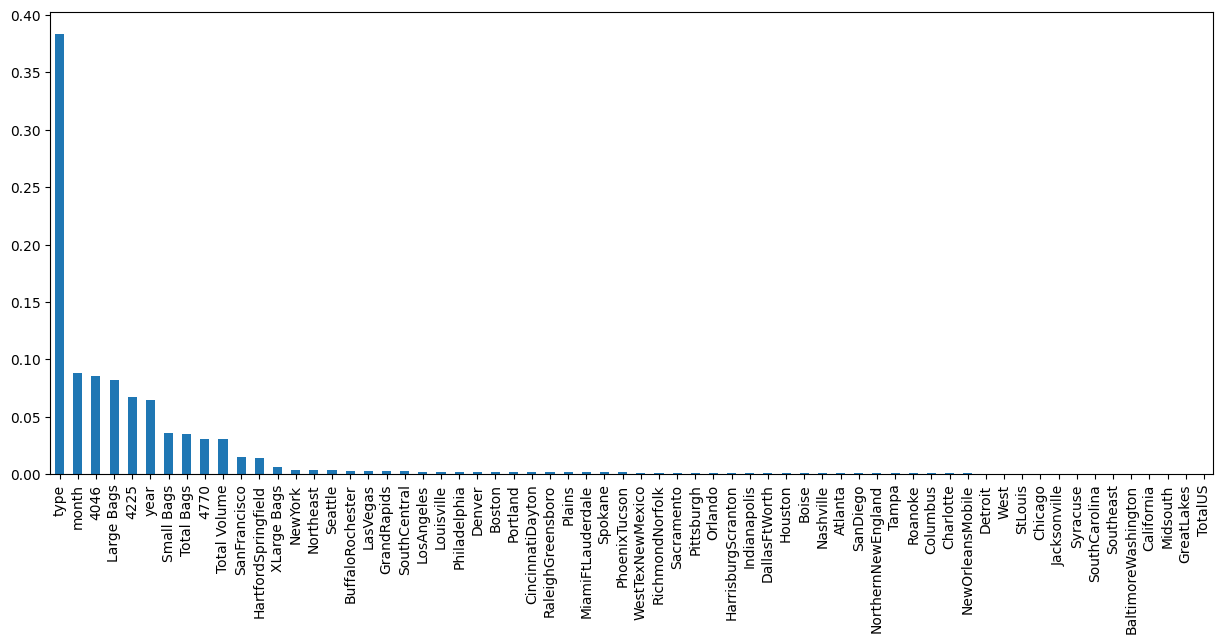

In [21]:
## Final regression model is the Random Forest

feature_importance=pd.Series(data=rfr.feature_importances_,
                             index=X.columns.values).sort_values(ascending=False)
plt.figure(figsize=(15,6))
feature_importance.plot.bar();
y_pred=rfr.predict(X_test_scaled)

In [22]:
selected_features=feature_importance.cumsum()[feature_importance.cumsum()<=0.95].index.values
selected_features

array(['type', 'month', '4046', 'Large Bags', '4225', 'year',
       'Small Bags', 'Total Bags', '4770', 'Total Volume', 'SanFrancisco',
       'HartfordSpringfield', 'XLarge Bags', 'NewYork', 'Northeast',
       'Seattle'], dtype=object)

In [23]:
X=X.copy()[selected_features]
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               shuffle=True,
                                               random_state=42)

scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [24]:
# Random forest model
rfr=RandomForestRegressor(random_state=42)
cv_score=cross_val_score(estimator=rfr,
                         X=X_train_scaled,
                         y=y_train,
                         scoring='neg_mean_absolute_error',
                         cv=10,
                         n_jobs=-1).mean()*-1
rfr.fit(X=X_train_scaled,
        y=y_train)
test_score=mean_absolute_error(y_pred=rfr.predict(X=X_test_scaled),
                               y_true=y_test)
print(f'Cross val score = {cv_score}')
print(f'Test score = {test_score}')
print(f'Score diff = {abs(cv_score-test_score)}')

Cross val score = 0.09595283564930004
Test score = 0.09433186301369861
Score diff = 0.001620972635601431


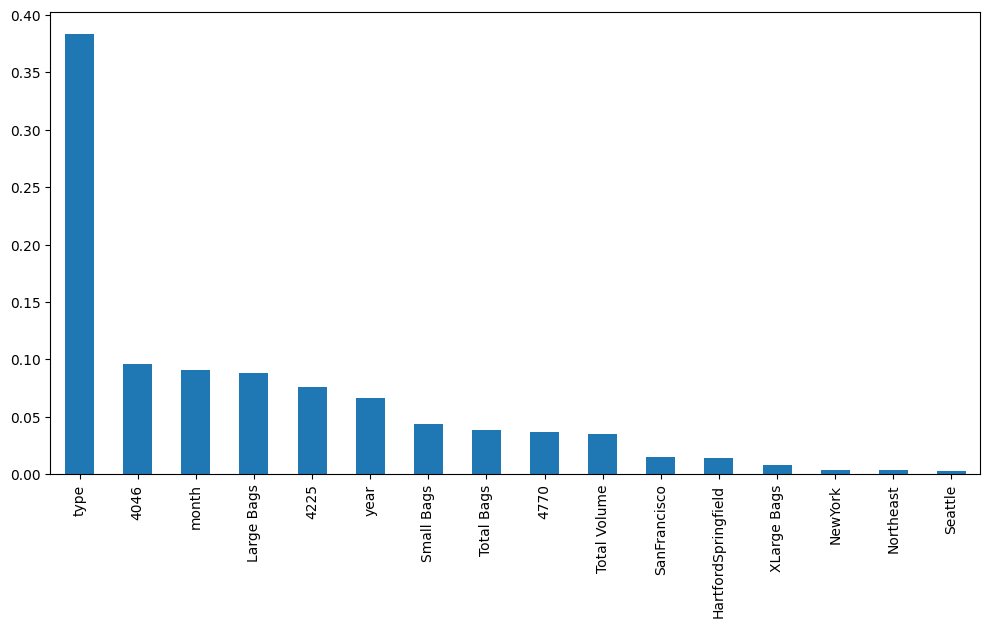

In [25]:
feature_importance=pd.Series(data=rfr.feature_importances_,
                             index=X.columns.values).sort_values(ascending=False)
plt.figure(figsize=(12,6))
feature_importance.plot.bar();
y_pred=rfr.predict(X_test_scaled)